In [2]:
!pip install python-docx 
!pip install deeppavlov
!pip install kmapper
!pip install chart-studio
!pip install persim
!pip install cython
!pip install ripser

     |████████████████████████████████| 5.5MB 16.2MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp36-none-any.whl size=184491 sha256=fe68664f5088da7b4f8342fd4be2e2d4385e56f8ddd3fdce677791b122300eef
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx
     |████████████████████████████████| 757kB 11.3MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 8.0MB 18.9MB/s 
     |████████████████████████████████| 6.7MB 52.3MB/s 
     |████████████████████████████████| 71kB 12.1MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 20.1MB 159kB/s 
     |████████████████████████████████| 1.5MB 48.5MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 7.3MB 44.7MB/s 
     |█████████████████████████████

     |████████████████████████████████| 102kB 12.9MB/s 


In [302]:
import deeppavlov
from deeppavlov.models.embedders.elmo_embedder import ELMoEmbedder
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec
import codecs
import numpy as np
import pandas as pd
import docx
import re
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from pymystem3 import Mystem
from sklearn.manifold import TSNE
import kmapper as km
from kmapper import jupyter
import umap
from ripser import ripser
from persim import plot_diagrams, bottleneck, bottleneck_matching
import sklearn
from sklearn import cluster
import csv
import collections
from chart_studio.plotly import plot, iplot
import plotly
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.cm as cm
import plotly.offline
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Содержание.

**ТК состоит из 6 частей, 14 разделов, 62 глав и 424 статей(не считая подпункты, например Статья 330.3).** 

ЧАСТЬ 1.

* Раздел I.

Глава 1.(ст.1-14) Глава 2.(ст.15-22)

ЧАСТЬ 2.

* Раздел II.

Глава 3.(ст.23-28) Глава 4.(ст.29-34) Глава 5.(ст.35) 
Глава 6.(ст.36-39)Глава 7.(ст.40-51) Глава 8.(ст.52-53)
Глава 9.(ст.54-55)

ЧАСТЬ 3.

* Раздел III.

Глава 10.(ст.56-62) Глава 11.(ст.63-71) Глава 12.(ст.72-76)
Глава 13.(ст.77-84) Глава 14.(ст.85-90)

* Раздел IV. 

Глава 15.(ст.91-99) Глава 16.(ст.100-105)

* Раздел V. 

Глава 17.(ст.106-107) Глава 18.(ст.108-113) Глава 19.(ст.114-128)

* Раздел VI.

Глава 20.(ст.129-132) Глава 21.(ст.133-158) Глава 22.(ст.159-163)

* Раздел VII.

Глава 23.(ст.164-166) Глава 24.(ст.167-169) Глава 25.(ст.170-172) 
Глава 26.(ст.173-177) Глава 27.(ст.178-181) Глава 28.(ст.182-188)

* Раздел VIII.

Глава 29.(ст.189-190) Глава 30.(ст.191-195)

* Раздел VIX.

Глава 31.(ст.195.1-197) Глава 32.(ст.198-208)

* Раздел X.

Глава 33.(ст.209-210) Глава 34.(ст.211-215)
Глава 35.(ст.216-218) Глава 36.(ст.219-231)

* Раздел XI.

Глава 37.(ст.232-233) Глава 38.(ст.234-237)
Глава 39.(ст.238-250)

ЧАСТЬ 4.

* Раздел XII.

Глава 40.(ст.251-252) Глава 41.(ст.253-264) Глава 42.(ст.265-272)
Глава 43.(ст.273-281) Глава 44.(ст.282-288) Глава 45.(ст.289-292)
Глава 46.(ст.293-296) Глава 47.(ст.297-302) Глава 48.(ст.303-309) 
Глава 49.(ст.310-312) Глава 49.1.(ст.312.1-312.5) 
Глава 50.(ст.313-327) Глава 51.(ст.328-330) 
Глава 51.1.(ст.330.1-330.5) Глава 52.(ст.331-336) 
Глава 53.(ст.337-341) Глава 54.(ст.342-348) 
Глава 54-1.(ст.348.1-348.12) Глава 55.(ст.349-351.2)

ЧАСТЬ 5.

* Раздел XIII.

Глава 56.(ст.352) Глава 57.(ст.353-369) Глава 58.(ст.370-378)
Глава 59.(ст.379-380) Глава 60.(ст.381-398) Глава 61.(ст.399-418) 
Глава 62.(ст.419)

ЧАСТЬ 6.

* Раздел XIV.
(ст.420-424)

## Чтение ТК

In [0]:
document = docx.Document("drive/My Drive/Thesis/data/LabourCode.docx")
text_, text = list(),list()
chapter_, chapter = '', ''
for paragraph in document.paragraphs:
    if paragraph.text!='':
        if paragraph.text.startswith('Статья') and chapter!='' and chapter_!='':
            text.append(chapter)
            text_.append(chapter_)
            chapter = ''
            chapter_ = ''
        if paragraph.text.endswith(('.',';',':')):
            chapter = chapter + paragraph.text
            chapter_ = chapter_ + paragraph.text
            if paragraph.text.endswith(('.',';')): #??????
                chapter = chapter[:-1] + '</s>'
        else:
            chapter = chapter + paragraph.text + '</s>'
            chapter_ = chapter_ + paragraph.text + '.'

In [277]:
labourcode_ = text_[1:] # original text
labourcode = text[1:] # text with separator </s>
labourcode_[0:5]

['Статья 1. Цели и задачи трудового законодательства.Целями трудового законодательства являются установление государственных гарантий трудовых прав и свобод граждан, создание благоприятных условий труда, защита прав и интересов работников и работодателей.Основными задачами трудового законодательства являются создание необходимых правовых условий для достижения оптимального согласования интересов сторон трудовых отношений, интересов государства, а также правовое регулирование трудовых отношений и иных непосредственно связанных с ними отношений по:организации труда и управлению трудом;трудоустройству у данного работодателя;подготовке и дополнительному профессиональному образованию работников непосредственно у данного работодателя;(в ред. Федерального закона от 02.07.2013 N 185-ФЗ).социальному партнерству, ведению коллективных переговоров, заключению коллективных договоров и соглашений;участию работников и профессиональных союзов в установлении условий труда и применении трудового законод

In [7]:
labourcode[0]

'Статья 1. Цели и задачи трудового законодательства</s>Целями трудового законодательства являются установление государственных гарантий трудовых прав и свобод граждан, создание благоприятных условий труда, защита прав и интересов работников и работодателей</s>Основными задачами трудового законодательства являются создание необходимых правовых условий для достижения оптимального согласования интересов сторон трудовых отношений, интересов государства, а также правовое регулирование трудовых отношений и иных непосредственно связанных с ними отношений по:организации труда и управлению трудом</s>трудоустройству у данного работодателя</s>подготовке и дополнительному профессиональному образованию работников непосредственно у данного работодателя</s>(в ред. Федерального закона от 02.07.2013 N 185-ФЗ)</s>социальному партнерству, ведению коллективных переговоров, заключению коллективных договоров и соглашений</s>участию работников и профессиональных союзов в установлении условий труда и применен

In [0]:
pattern = re.compile(r"^Статья ([\d|\.]+)\. (.*)$")
data_, data = {}, {}
for article in labourcode_:
    d = re.findall(pattern, article)
    if len(d)!=0:
        data_[d[0][0]] = d[0][1]
for article in labourcode:
    d = re.findall(pattern, article)
    if len(d)!=0:
        data[d[0][0]] = d[0][1]

In [0]:
lc = {'Article №': list(data_.keys()), 'Text': list(data_.values()), 'CleanText': list(data.values()),'SentenceList': list(data.values()), 'TokensList': list(data.values())}

In [0]:
df = pd.DataFrame(lc)

## Preprocessing

In [0]:
def get_sents(text):
  sentences = text.split('</s>')
  sentences = [s.strip() for s in sentences if s!='']
  return sentences

def preprocess_sentence(sentence):
    '''Remove dates, digits, punctuation, Russian stop words(extended list)'''
    ru_stopwords = stopwords.words('russian')
    stop = ['фз', 'n', 'ред', 'ст']
    ru_stopwords.extend(stop)
    dgts = [str(i) for i in range(10)]
    punctuation = '!"#$%&():*+-/<=>?@[\]^_`{|}~,.'
    sentence = re.sub(r'\d+', '', sentence)
    for s in punctuation:
        sentence = sentence.replace(s, ' ')
    sentence = re.sub( '\s+', ' ', sentence).strip()
    tokens = nltk.word_tokenize(sentence, language='russian')
    tokens = [token for token in tokens if token not in ru_stopwords\
              and token not in dgts\
              and token != " "]
    sentence = " ".join(tokens)
    return sentence

def preprocess_text(text):
    text = text.lower()
    sentences = get_sents(text)
    sentences_, tokens = list(), list()
    for sent in sentences:
      sent = preprocess_sentence(sent)
      sentences_.append(sent + '</s>')
    text = " ".join(sentences_)
    return text

def get_tokens(text):
  tokens= list()
  sentences = get_sents(text)
  for sent in sentences:
    s_tokens = nltk.word_tokenize(sent, language='russian')
    s_tokens = [token for token in s_tokens if token != " "]
    if len(s_tokens)!=0:
      tokens.append(s_tokens)
  return tokens

In [0]:
for i in range(len(df['CleanText'])):
    df['CleanText'][i] = preprocess_text(df['CleanText'][i])
    df['SentenceList'][i] = get_sents(df['CleanText'][i])
    df['TokensList'][i] = get_tokens(df['CleanText'][i])

In [12]:
df.sample(10)

,Article №,Text,CleanText,SentenceList,TokensList
247,227,"Несчастные случаи, подлежащие расследованию и ...",несчастные случаи подлежащие расследованию уче...,[несчастные случаи подлежащие расследованию уч...,"[[несчастные, случаи, подлежащие, расследовани..."
202,186,Гарантии и компенсации работникам в случае сда...,гарантии компенсации работникам случае сдачи и...,[гарантии компенсации работникам случае сдачи ...,"[[гарантии, компенсации, работникам, случае, с..."
127,116,Ежегодные дополнительные оплачиваемые отпуска....,ежегодные дополнительные оплачиваемые отпуска<...,[ежегодные дополнительные оплачиваемые отпуска...,"[[ежегодные, дополнительные, оплачиваемые, отп..."
263,238,Материальная ответственность работника за ущер...,материальная ответственность работника ущерб п...,[материальная ответственность работника ущерб ...,"[[материальная, ответственность, работника, ущ..."
63,60,"Запрещение требовать выполнения работы, не обу...",запрещение требовать выполнения работы обуслов...,[запрещение требовать выполнения работы обусло...,"[[запрещение, требовать, выполнения, работы, о..."
445,364,Ответственность государственных инспекторов тр...,ответственность государственных инспекторов тр...,[ответственность государственных инспекторов т...,"[[ответственность, государственных, инспекторо..."
304,276,Работа руководителя организации по совместител...,работа руководителя организации совместительст...,[работа руководителя организации совместительс...,"[[работа, руководителя, организации, совместит..."
481,400,"Рассмотрение требований работников, профессион...",рассмотрение требований работников профессиона...,[рассмотрение требований работников профессион...,"[[рассмотрение, требований, работников, профес..."
80,72,Изменение определенных сторонами условий трудо...,изменение определенных сторонами условий трудо...,[изменение определенных сторонами условий труд...,"[[изменение, определенных, сторонами, условий,..."
120,109,Специальные перерывы для обогревания и отдыха....,специальные перерывы обогревания отдыха</s> от...,"[специальные перерывы обогревания отдыха, отде...","[[специальные, перерывы, обогревания, отдыха],..."


## Embeddings

In [0]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

In [13]:
elmo = ELMoEmbedder("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-wiki_600k_steps.tar.gz")

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


### Simple example of sentence embedding

In [0]:
sent1 = elmo([['вопрос', 'жизни', 'Вселенной', 'и', 'вообще', 'всего']])
sent1

array([[-0.22791581,  0.07285882, -0.4693267 , ...,  0.32489085,
         0.16321455, -0.15760408]], dtype=float32)

In [0]:
sent1.shape

(1, 1024)

### Embeddings of the Labour Code

In [14]:
sent = elmo(df['TokensList'][0])
sent, sent.shape, len(df['TokensList'][0])

(array([[-0.22810686,  0.1956717 ,  0.05869008, ...,  0.1934332 ,
          0.98120344, -0.54274714],
        [-0.08671846, -0.43708658, -0.05983023, ...,  0.13102421,
          0.65748656, -0.26309767],
        [-0.24975255, -0.00115161, -0.22065973, ...,  0.21881309,
          0.3562771 , -0.19120866],
        ...,
        [ 0.9814391 , -0.44105062, -0.00118074, ...,  0.65208226,
          0.37582895, -0.6856761 ],
        [-0.09110795, -0.48805   ,  0.06507654, ..., -0.49216366,
          0.4514823 , -0.639512  ],
        [-0.06037433, -0.163436  , -0.1235569 , ..., -0.4384199 ,
          0.39786494, -0.5720996 ]], dtype=float32), (14, 1024), 14)

In [0]:
embeddings = list()
for i in range(len(df['TokensList'])):
  embeddings.append(elmo(df['TokensList'][i]))

df['Embeddings'] = embeddings

In [16]:
df.sample(10)

,Article №,Text,CleanText,SentenceList,TokensList,Embeddings
74,67,Форма трудового договора.Трудовой договор закл...,форма трудового договора</s> трудовой договор ...,"[форма трудового договора, трудовой договор за...","[[форма, трудового, договора], [трудовой, дого...","[[0.003593872, 0.40009034, 0.22068469, 0.63457..."
494,413,Незаконные забастовки.В соответствии со статье...,незаконные забастовки</s> соответствии статьей...,"[незаконные забастовки, соответствии статьей к...","[[незаконные, забастовки], [соответствии, стат...","[[0.8745048, -0.1791228, -0.292001, -0.2202528..."
187,173.1,"Гарантии и компенсации работникам, совмещающим...",гарантии компенсации работникам совмещающим ра...,[гарантии компенсации работникам совмещающим р...,"[[гарантии, компенсации, работникам, совмещающ...","[[-0.4850841, -0.33360055, -0.1329479, 0.11980..."
280,255,Отпуска по беременности и родам.Женщинам по их...,отпуска беременности родам</s> женщинам заявле...,"[отпуска беременности родам, женщинам заявлени...","[[отпуска, беременности, родам], [женщинам, за...","[[0.09666926, 0.08237899, -0.15595129, 0.48533..."
169,157,Оплата времени простоя.Время простоя настояще...,оплата времени простоя</s> время простоя насто...,"[оплата времени простоя, время простоя настоящ...","[[оплата, времени, простоя], [время, простоя, ...","[[-0.19711828, -0.88072664, 0.3616477, -0.6077..."
385,336.1,Особенности заключения и прекращения трудового...,особенности заключения прекращения трудового д...,[особенности заключения прекращения трудового ...,"[[особенности, заключения, прекращения, трудов...","[[0.37192816, 0.4980471, -0.3349769, 0.0086988..."
79,71,Результат испытания при приеме на работу.При н...,результат испытания приеме работу</s> неудовле...,"[результат испытания приеме работу, неудовлетв...","[[результат, испытания, приеме, работу], [неуд...","[[-0.82710886, 0.066825695, 0.20490655, -0.584..."
303,275,Заключение трудового договора с руководителем ...,заключение трудового договора руководителем ор...,[заключение трудового договора руководителем о...,"[[заключение, трудового, договора, руководител...","[[-0.15134463, 0.20871958, -0.1168334, 0.10195..."
34,34,Иные представители работодателей.(в ред. Федер...,иные представители работодателей</s> федеральн...,"[иные представители работодателей, федеральног...","[[иные, представители, работодателей], [федера...","[[-0.50298375, 0.034138564, -0.043914616, 0.32..."
134,123,Очередность предоставления ежегодных оплачивае...,очередность предоставления ежегодных оплачивае...,[очередность предоставления ежегодных оплачива...,"[[очередность, предоставления, ежегодных, опла...","[[-0.56763494, -0.5146183, -0.7264492, -0.8225..."


Как сохранить dataframe, чтобы можно было считать массив?

In [0]:
df.to_csv(r'drive/My Drive/Thesis/DataFrame/dataframe_LabourCode.csv', index = False)

In [0]:
df2 = pd.read_csv('drive/My Drive/Thesis/DataFrame/dataframe_LabourCode.csv', sep=',')
df2.head()

,Article №,Text,CleanText,SentenceList,TokensList,Embeddings
0,1.0,Цели и задачи трудового законодательства.Целям...,цели задачи трудового законодательства</s> цел...,"['цели задачи трудового законодательства', 'це...","[['цели', 'задачи', 'трудового', 'законодатель...",[[-0.29232886 0.17375308 -0.08496491 ... 0.1...
1,2.0,Основные принципы правового регулирования труд...,основные принципы правового регулирования труд...,['основные принципы правового регулирования тр...,"[['основные', 'принципы', 'правового', 'регули...",[[ 0.12884177 0.10830875 0.05851702 ... 0.0...
2,3.0,Запрещение дискриминации в сфере труда.Каждый ...,запрещение дискриминации сфере труда</s> кажды...,"['запрещение дискриминации сфере труда', 'кажд...","[['запрещение', 'дискриминации', 'сфере', 'тру...",[[-0.38215995 -1.0119139 0.25641403 ... 0.7...
3,4.0,Запрещение принудительного труда.Принудительны...,запрещение принудительного труда</s> принудите...,"['запрещение принудительного труда', 'принудит...","[['запрещение', 'принудительного', 'труда'], [...",[[-0.04473098 -0.84571433 -0.31726566 ... 0.9...
4,5.0,"Трудовое законодательство и иные акты, содержа...",трудовое законодательство иные акты содержащие...,['трудовое законодательство иные акты содержащ...,"[['трудовое', 'законодательство', 'иные', 'акт...",[[ 7.3362656e-02 3.6388353e-01 -5.6537825e-01...


In [0]:
df.tail()

,Article №,Text,CleanText,SentenceList,TokensList,Embeddings
500,419,Виды ответственности за нарушение трудового за...,виды ответственности нарушение трудового закон...,[виды ответственности нарушение трудового зако...,"[[виды, ответственности, нарушение, трудового,...","[[0.16471618, 0.26036975, -0.261154, 0.0027894..."
501,420,Сроки введения в действие настоящего Кодекса.Н...,сроки введения действие настоящего кодекса</s>...,"[сроки введения действие настоящего кодекса, н...","[[сроки, введения, действие, настоящего, кодек...","[[0.19854894, 0.17068318, 0.44005036, -0.35006..."
502,421,Порядок и сроки введения минимального размера ...,порядок сроки введения минимального размера оп...,[порядок сроки введения минимального размера о...,"[[порядок, сроки, введения, минимального, разм...","[[-0.014863242, -0.119826496, -0.22384548, -0...."
503,422,Признание утратившими силу отдельных законодат...,признание утратившими силу отдельных законодат...,[признание утратившими силу отдельных законода...,"[[признание, утратившими, силу, отдельных, зак...","[[0.40602633, 0.20294352, -0.09668777, -0.5758..."
504,423,Применение законов и иных нормативных правовых...,применение законов иных нормативных правовых а...,[применение законов иных нормативных правовых ...,"[[применение, законов, иных, нормативных, прав...","[[-0.38936612, 0.6510145, 0.11729815, -0.62035..."


In [0]:
df2['Embeddings'][0]

'[[-0.29232886  0.17375308 -0.08496491 ...  0.10873996  0.9771477\n  -0.5333787 ]\n [-0.13815095 -0.4208269  -0.08140378 ...  0.1327773   0.64991796\n  -0.23480415]\n [-0.28279787  0.0271132  -0.24926314 ...  0.2529559   0.3213948\n  -0.17194878]\n ...\n [ 0.8820545  -0.44130087 -0.11332431 ...  0.69300765  0.2494682\n  -0.69536704]\n [-0.15280263 -0.6230334   0.09714627 ... -0.53483164  0.42518848\n  -0.64611065]\n [-0.08250816 -0.23525247 -0.04393259 ... -0.5345362   0.31859678\n  -0.5771429 ]]'

In [16]:
df.shape

(505, 6)

## Save necessary data as TSV file

In [0]:
'''Части: 23, 35, 218, 155, 69, 5'''
parts = [23, 35, 218, 155, 69, 5]
'''Разделы: 23 статьи, 35, 44, 15, 23, 36, 29, 7, 16, 29, 19, 155, 69, 5
Всего: 505 статей'''
chapters = [23,35,44,15,23,36,29,7,16,29,19,155,69,5]

with open("drive/My Drive/Thesis/EmbeddingProjector/embeddings.tsv", "w", newline='\n') as f:
    writer = csv.writer(f, delimiter='\t')
    for emb in df['Embeddings']:
      for e in emb:
        writer.writerow(e)

In [0]:
c = 1
parts_words = []
for p in parts:
  for i in range(p):
    parts_words.append('Часть '+ str(c))
  c+=1

In [0]:
c_ = 1
chapters_words = []
for ch in chapters:
  for i in range(ch):
    chapters_words.append('Раздел '+ str(c_))
  c_+=1

In [0]:
with open("drive/My Drive/Thesis/EmbeddingProjector/parts_labels_emb.tsv", "w", newline='\n') as f:
    writer = csv.writer(f, delimiter='\t')
    for num, sent, label in zip(df['Article №'], df['SentenceList'], parts_words):
      article = 'Статья ' + str(num) + '. '
      for s in sent:
        sentence = article + s
        writer.writerow([sentence, label])

In [0]:
with open("drive/My Drive/Thesis/EmbeddingProjector/chapters_labels_emb.tsv", "w", newline='\n') as f:
    writer = csv.writer(f, delimiter='\t')
    for num, sent, label in zip(df['Article №'], df['SentenceList'], chapters_words):
      article = 'Статья ' + str(num) + '. '
      for s in sent:
        sentence = article + s
        writer.writerow([sentence, label])

## Visualization

## *Kepler Mapper*

In [0]:
def KeplerMapperVisualise(ind, ind2 = 0, filename='', title='', show=False):
    '''Returns the simplicial_complex - a dictionary with “nodes”, “links” and “meta” information'''
    if title=='':
      title = "Article №" + str(df['Article №'][ind])
    # Initialize
    mapper = km.KeplerMapper(verbose=0)
    # Fit to and transform the data
    if ind2 ==0:
      data_array = df['Embeddings'][ind]
      n = 3
      o = 0.7
    else:
      data_array = []
      for emb in df['Embeddings'][ind:ind2]:
        for e in emb:
          data_array.append(e)
      n = 35
      o = 0.7
    projected_data = mapper.fit_transform(data_array, projection=umap.UMAP(n_components=2,
                                                                     metric='cosine'))
    print("Shape of projected data: ", projected_data.shape)
    # Create dictionary called 'graph' with nodes, edges
    graph = mapper.map(projected_data, clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                             linkage="complete" , # complete, average
                                                             affinity="cosine"),
                          cover=km.Cover(n_cubes=n, #35, 10, 25, 3
                                         perc_overlap=o), #0.9, 0.7, 0.9, 0.7/0.9
                                         remove_duplicate_nodes=True)
    # Visualize it
    if filename=='':
      path = 'drive/My Drive/Thesis/KeplerMapperPictures/'+'Article_'+ str(df['Article №'][ind]) +'.html'
    else:
      path = 'drive/My Drive/Thesis/KeplerMapperPictures/'+ filename + '.html'
    html = mapper.visualize(graph, path_html=path, title=title) #custom_tooltips = df['SentenceList'][ind])
    if show:
        km.drawing.draw_matplotlib(graph)

In [229]:
max_len = 0
max_ind = -1
for i in range(len(df['Embeddings'])):
  len_emb = len(df['Embeddings'][i])
  if len_emb > max_len:
    max_len = len_emb
    max_ind = i
print('Max sentence number: ', max_len)
print('Index:', max_ind)

Max sentence number:  48
Index: 503


Shape of projected data:  (294, 2)


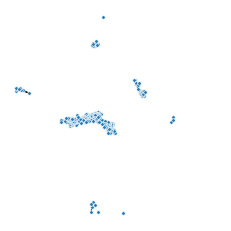

In [271]:
KeplerMapperVisualise(0,23,'Раздел_1', 'Раздел №1', show=True)

Shape of projected data:  (282, 2)


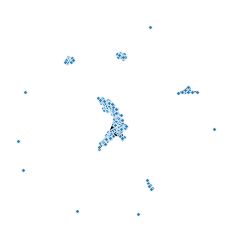

In [273]:
KeplerMapperVisualise(23,58,'Раздел_2', 'Раздел №2', show=True)

Shape of projected data:  (4103, 2)


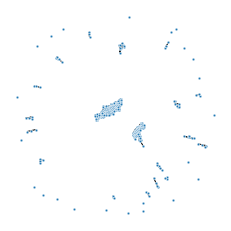

In [275]:
KeplerMapperVisualise(0,506,'ТК', 'TK', show=True)

Shape of projected data:  (14, 2)


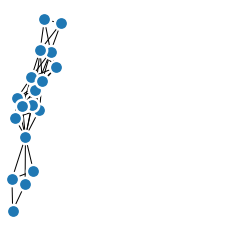

In [263]:
KeplerMapperVisualise(0, show=True)

Shape of projected data:  (24, 2)


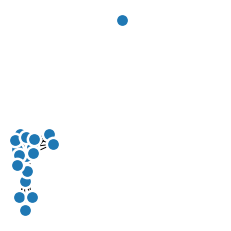

In [252]:
KeplerMapperVisualise(1, show=True)

Shape of projected data:  (7, 2)


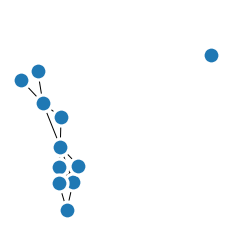

In [222]:
KeplerMapperVisualise(248, show=True)

Shape of projected data:  (13, 2)


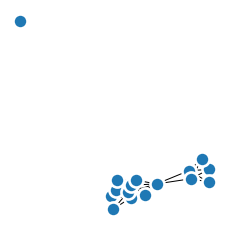

In [243]:
KeplerMapperVisualise(155, show=True)

Shape of projected data:  (48, 2)


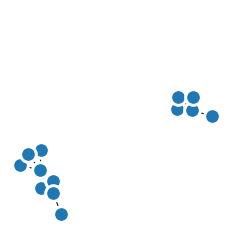

In [228]:
KeplerMapperVisualise(503, show=True)

## *Persistence diagrams*

In [0]:
def PersDiagram(ind, title=''):
  reducer = umap.UMAP(metric='cosine')
  projected_data = reducer.fit_transform(df['Embeddings'][ind])
  if title=='':
    title = "Article №" + str(df['Article №'][ind])
  diagram = ripser(projected_data)['dgms']
  plot_diagrams(diagram, title= title, show=True)

In [0]:
def BottleneckMatching(ind1, ind2):
  reducer = umap.UMAP(metric='cosine')
  projected_data1 = reducer.fit_transform(df['Embeddings'][ind1])
  title1 = "Article №" + str(df['Article №'][ind1])
  diagram1 = ripser(projected_data1)['dgms'][1]

  projected_data2 = reducer.fit_transform(df['Embeddings'][ind2])
  title2 = "Article №" + str(df['Article №'][ind2])
  diagram2 = ripser(projected_data2)['dgms'][1]

  d, (matching, D) = bottleneck(diagram1, diagram2, matching=True)
  bottleneck_matching(diagram1, diagram2, matching, D, labels=[title1, title2])
  plt.title("Distance {:.3f}".format(d))
  plt.show()

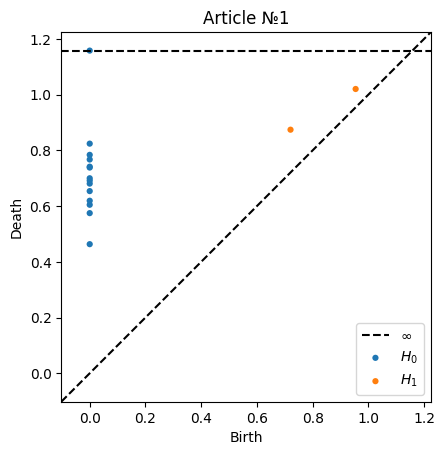

In [295]:
PersDiagram(0)

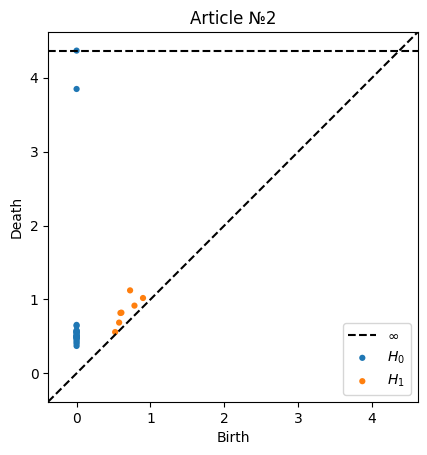

In [292]:
PersDiagram(1)

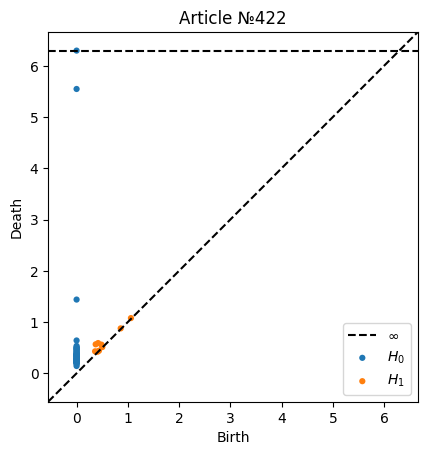

In [293]:
PersDiagram(503)

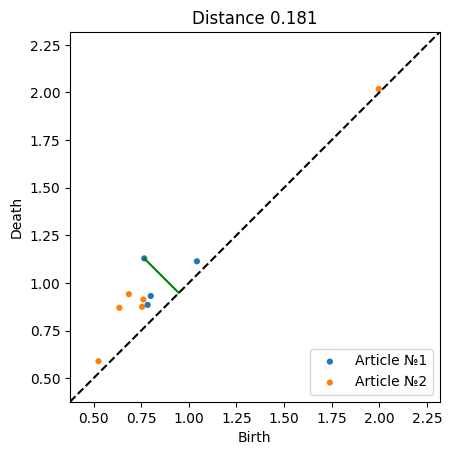

In [319]:
BottleneckMatching(0,1)

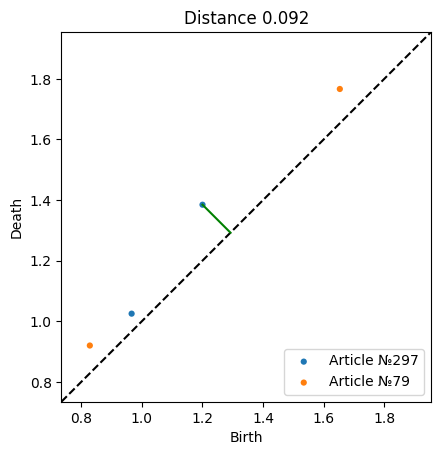

In [320]:
BottleneckMatching(325,89)

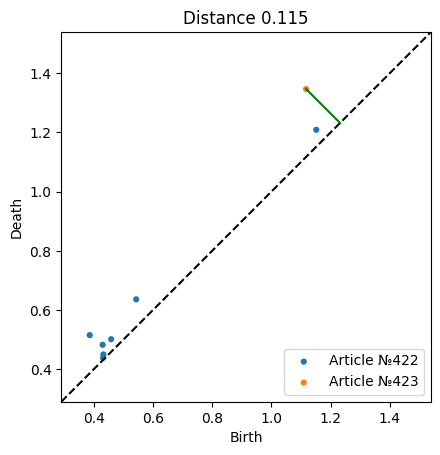

In [321]:
BottleneckMatching(503,504)